# Logistic regression

# Dataset:
German Credit

In [1]:
# importing the needed libraries 

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [3]:
#import pandas 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE



# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

In [4]:
# type your code here

# load the csv file
# store the data in 'df_admissions'
df = pd.read_excel('GermanCredit.xlsx')

# display first five observations using head()
df.head()


,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


# 2. Check how many records do we have


In [3]:
df.shape

(1000, 3)

In [4]:
df.describe()

,Creditability,CreditAmount,DurationOfCreditInMonths
count,1000.000000,1000.000000,1000.000000
mean,0.700000,3271.248000,20.903000
std,0.458487,2822.751760,12.058814
min,0.000000,250.000000,4.000000
25%,0.000000,1365.500000,12.000000
50%,1.000000,2319.500000,18.000000
75%,1.000000,3972.250000,24.000000
max,1.000000,18424.000000,72.000000


# 3. Plot Histogram for column 'CreditAmount'

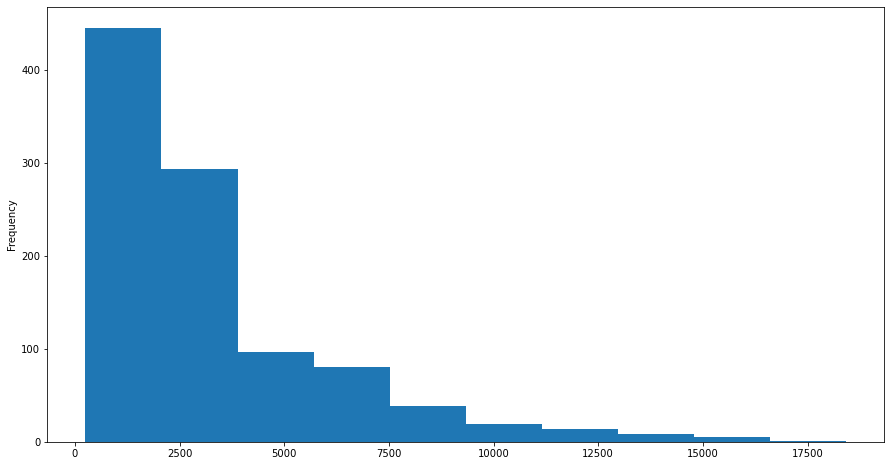

In [5]:
df['CreditAmount'].plot(kind='hist')
plt.show()

# 3b. Create creditability dataframe

In [6]:
amountIntervalsPoints = np.array([0, 500, 1000,1500,2000, 2500, 5000, 7500, 10000, 15000, 20000])

In [7]:
Amount_Intervals = [(amountIntervalsPoints[i] + int(i != 0), amountIntervalsPoints[i + 1]) for i in np.arange(len(amountIntervalsPoints) - 1)]  
Amount_Intervals

[(0, 500),
 (501, 1000),
 (1001, 1500),
 (1501, 2000),
 (2001, 2500),
 (2501, 5000),
 (5001, 7500),
 (7501, 10000),
 (10001, 15000),
 (15001, 20000)]

In [8]:

data = pd.DataFrame(Amount_Intervals, columns=['intervalLeftside', 'intervalRightside'])

print(data)

   intervalLeftside  intervalRightside
0                 0                500
1               501               1000
2              1001               1500
3              1501               2000
4              2001               2500
5              2501               5000
6              5001               7500
7              7501              10000
8             10001              15000
9             15001              20000


In [10]:
Credibility0 = []
Credibility1 = []
for interval in Amount_Intervals:
    subData = df[df.CreditAmount >= interval[0]]
    subData = subData[subData.CreditAmount <= interval[1]]
    Credibility0.append(sum(subData.Creditability == 0))
    Credibility1.append(sum(subData.Creditability == 1))

In [20]:
data2 = pd.DataFrame(
    {'Credibility0': Credibility0 ,
     'Credibility1': Credibility1})
data2

,Credibility0,Credibility1
0,3,15
1,34,64
2,51,139
3,33,93
4,26,79
5,75,200
6,34,68
7,20,26
8,21,14
9,3,2


In [21]:
result = pd.concat([data,data2],axis=1)
display(result)

,intervalLeftside,intervalRightside,Credibility0,Credibility1
0,0,500,3,15
1,501,1000,34,64
2,1001,1500,51,139
3,1501,2000,33,93
4,2001,2500,26,79
5,2501,5000,75,200
6,5001,7500,34,68
7,7501,10000,20,26
8,10001,15000,21,14
9,15001,20000,3,2


In [22]:
result.columns

Index(['intervalLeftside', 'intervalRightside', 'Credibility0',
       'Credibility1'],
      dtype='object')

In [23]:
result['total'] = result.loc[:,['Credibility0','Credibility1']].sum(axis=1)
result

,intervalLeftside,intervalRightside,Credibility0,Credibility1,total
0,0,500,3,15,18
1,501,1000,34,64,98
2,1001,1500,51,139,190
3,1501,2000,33,93,126
4,2001,2500,26,79,105
5,2501,5000,75,200,275
6,5001,7500,34,68,102
7,7501,10000,20,26,46
8,10001,15000,21,14,35
9,15001,20000,3,2,5


# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

In [24]:
result.Credibility0.value_counts()

3     2
34    2
51    1
33    1
26    1
75    1
20    1
21    1
Name: Credibility0, dtype: int64

In [25]:
result.Credibility1.value_counts()

15     1
64     1
139    1
93     1
79     1
200    1
68     1
26     1
14     1
2      1
Name: Credibility1, dtype: int64

In [26]:
result.Credibility0.sum()

300

In [27]:
result.Credibility1.sum()

700

# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

<AxesSubplot:>

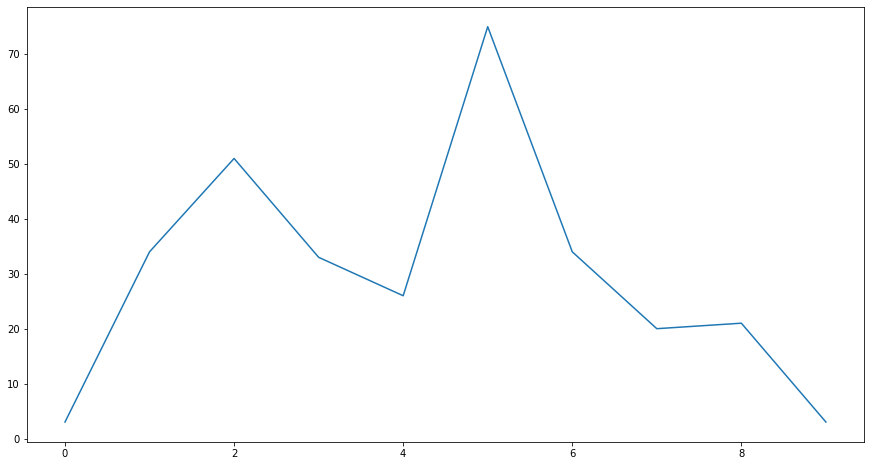

In [31]:
result.Credibility0.plot.line()

<AxesSubplot:>

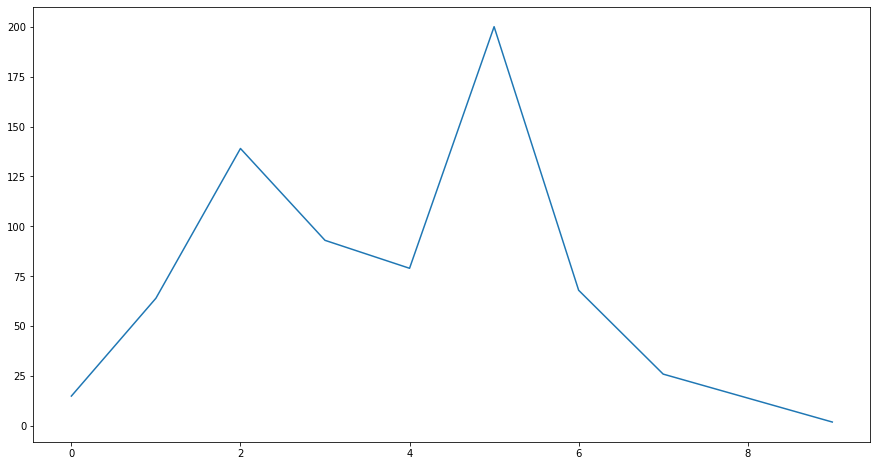

In [32]:
result.Credibility1.plot.line()

# 6. Prepare input data for the model

In [1]:
# DATA PREPARATION

In [5]:
df.shape

(1000, 3)

In [6]:
df.dtypes

Creditability               int64
CreditAmount                int64
DurationOfCreditInMonths    int64
dtype: object

In [8]:
df.isnull().sum()

Creditability               0
CreditAmount                0
DurationOfCreditInMonths    0
dtype: int64

<Figure size 1080x576 with 0 Axes>

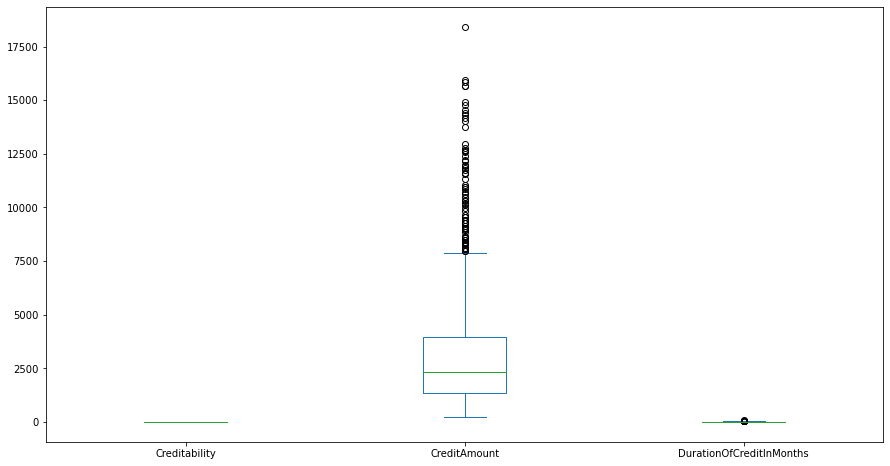

In [9]:
plt.figure(figsize=(15,8))
df.plot(kind='box')
plt.show()

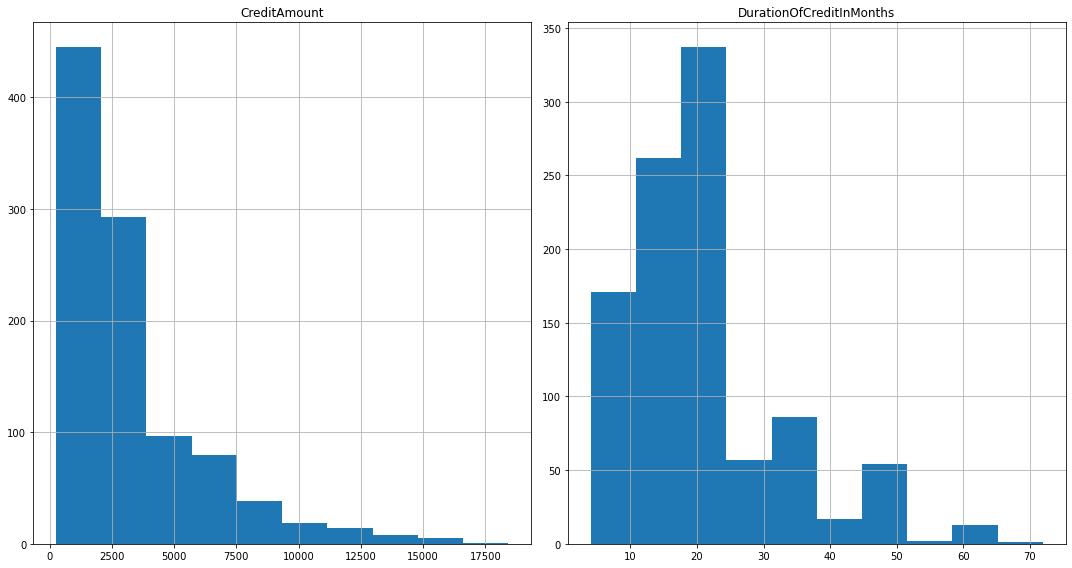

Skewness:


CreditAmount               1.949594
DurationOfCreditInMonths   1.094184
dtype: float64

In [17]:
df.drop('Creditability', axis = 1).hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()  

# print the skewness for each numeric independent variable
print('Skewness:')
# we drop the target variable using drop()
# 'axis=1' drops the specified column
# skew() returns the coefficient of skewness for each variable
df.drop('Creditability', axis = 1).skew()

In [13]:
df.Creditability.value_counts()            

1    700
0    300
Name: Creditability, dtype: int64

In [14]:
# NO MISSING VALUES 
# NO CATGEORICAL VARAIABLES HENCE NO IMPUTATION NEEDED 

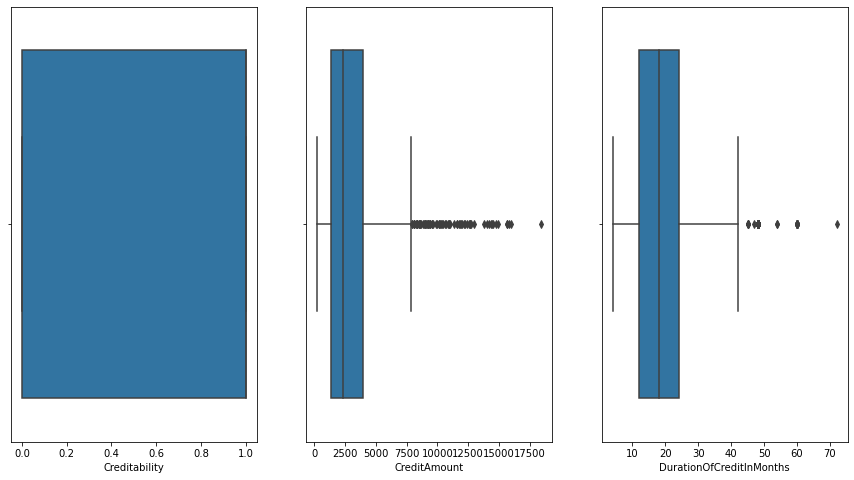

In [22]:

# consider the numeric variables
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(15,8))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(df.columns, ax.flatten()):
    sns.boxplot(df[variable], ax = subplot)

# display the plot
plt.show()

In [19]:
Q1 = df.quantile(0.25)
Q2 = df.quantile(0.5)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1
IQR

Creditability                 1.000000
CreditAmount               2606.750000
DurationOfCreditInMonths     12.000000
dtype: float64

In [74]:
df = df[~((df < (Q1 - 1.5 *IQR)) | (df > (Q3 + 1.5 *IQR))).any(axis=1)]
df.shape

(884, 3)

In [24]:
# EAILER SHAPE WAS 1000 * 3 now THE ROWS HAVE BEEN REDUCED TO 884 BY OUTLIER REDUCTION

In [25]:
df_feat = df.drop('Creditability',axis=1)

In [26]:
s_f = StandardScaler().fit_transform(df_feat)# initialize the StandardScaler
s_f                  # normalize all the columns of the dataframe 's_f'

array([[-0.88726014, -0.00533196],
       [ 0.15756297, -1.03999149],
       [-1.01144483, -0.69510498],
       ...,
       [-0.13856975,  0.68444107],
       [ 2.34810925, -0.69510498],
       [ 2.27765832,  1.37421409]])

In [28]:
scaled_features = pd.DataFrame(s_f, columns = df_feat.columns)

round(scaled_features.describe())

,CreditAmount,DurationOfCreditInMonths
count,884.000000,884.000000
mean,-0.000000,-0.000000
std,1.000000,1.000000
min,-1.000000,-2.000000
25%,-1.000000,-1.000000
50%,-0.000000,-0.000000
75%,1.000000,1.000000
max,3.000000,3.000000


In [201]:
scaled_features.shape

(884, 2)

In [203]:
df_target = df['Creditability']
df_target.head()

0    1
1    1
2    1
3    1
4    1
Name: Creditability, dtype: int64

# 7. Fit logistic regression model

In [254]:
X = scaled_features
y = df_target

In [255]:
X = sm.add_constant(X)

In [256]:
X.shape

(884, 3)

In [257]:
y.shape

(884,)

In [258]:
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10, test_size = 0.3)


In [259]:
# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (618, 3)
y_train (618,)
X_test (266, 3)
y_test (266,)


In [260]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg = sm.Logit(y_train.values, X_train).fit()

# print the summary of the model
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.571100
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  618
Model:                          Logit   Df Residuals:                      615
Method:                           MLE   Df Model:                            2
Date:                Mon, 15 Aug 2022   Pseudo R-squ.:                 0.02122
Time:                        18:52:25   Log-Likelihood:                -352.94
converged:                       True   LL-Null:                       -360.59
Covariance Type:            nonrobust   LLR p-value:                 0.0004744
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.0202      0.093     11.001      0.000       0.838

In [261]:
# 'aic' retuns the AIC value for the model
print('AIC:', logreg.aic)

AIC: 711.8791769193926


In [262]:
# The LLR p-value is less than 0.05, implies that the model is significant.
# Here the LLR P VALUE IS 0.0004744 hence the model is significant

In [263]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg.predict(X_test)

# print the y_pred_prob
y_pred_prob.head()

188   0.886822
431   0.718672
271   0.794012
403   0.751454
354   0.684770
dtype: float64

In [119]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.557504
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  707
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            2
Date:                Mon, 15 Aug 2022   Pseudo R-squ.:                 0.02507
Time:                        12:11:59   Log-Likelihood:                -394.16
converged:                       True   LL-Null:                       -404.29
Covariance Type:            nonrobust   LLR p-value:                 3.963e-05
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.0895      0.089     12.305      0.000       0.916

In [273]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg.predict(X_test)

# print the y_pred_prob
y_pred_prob.head()

188   0.886822
431   0.718672
271   0.794012
403   0.751454
354   0.684770
dtype: float64

In [274]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

In [275]:
# print the first five observations of y_pred
y_pred[0:5]

[1, 1, 1, 1, 1]

# 8. Test accuracy calculation

In [277]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test,y_pred)

0.7443609022556391

# 9. Build a confusion matrix

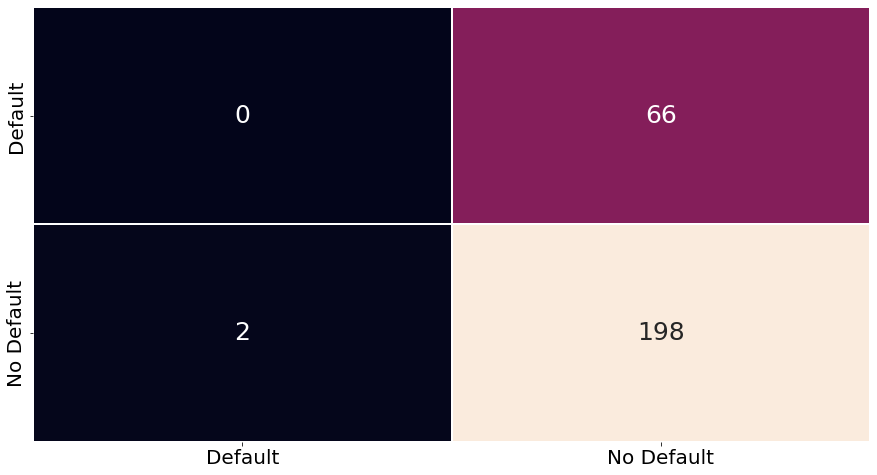

In [280]:
cm = confusion_matrix(y_test,y_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ["Default", "No Default"], index = ["Default", "No Default"])

sns.heatmap(conf_matrix, annot = True, fmt = 'd',cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_df.originalCredibility, y_pred_df.predicted)
cm
conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                       index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.show()

In [302]:
X = np.array(df.CreditAmount)
Y = df.Creditability.astype('category')

In [303]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 42 )
logit = sm.Logit( y_train, sm.add_constant( X_train ) )
lg = logit.fit()
lg.summary2()

Optimization terminated successfully.
         Current function value: 0.567746
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Pseudo R-squared: 0.001   
Dependent Variable: Creditability    AIC:              705.7338
Date:               2022-08-15 19:07 BIC:              714.5867
No. Observations:   618              Log-Likelihood:   -350.87 
Df Model:           1                LL-Null:          -351.32 
Df Residuals:       616              LLR p-value:      0.34344 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     5.0000                                     
-----------------------------------------------------------------
           Coef.    Std.Err.     z      P>|z|     [0.025   0.975]
-----------------------------------------------------------------
const      0.9352     0.1679   5.5698   0.0000    0.6061   1.2643
x1         0.0001     0.0001   0.9374   0.3485   -0.0001   0.0002
===============================================================

"""

In [304]:
def get_predictions( y_test, model ):
    y_pred_df = pd.DataFrame( { 'actual': y_test,
                               "predicted_prob": lg.predict( sm.add_constant( X_test ) ) } )
    return y_pred_df

X_test[0:5]

array([1216, 1409, 1155, 1042, 6199], dtype=int64)

In [305]:
y_pred_df = get_predictions(X_test, lg )
y_pred_df['originalCredibility'] = np.array(y_test)
y_pred_df[0:5]

,actual,predicted_prob,originalCredibility
0,1216,0.731203,0
1,1409,0.733244,1
2,1155,0.730556,1
3,1042,0.729356,0
4,6199,0.780640,0


In [306]:
y_pred_df.count()

actual                 266
predicted_prob         266
originalCredibility    266
dtype: int64

In [307]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.6 else 0)
y_pred_df[0:10]

,actual,predicted_prob,originalCredibility,predicted
0,1216,0.731203,0,1
1,1409,0.733244,1,1
2,1155,0.730556,1,1
3,1042,0.729356,0,1
4,6199,0.780640,0,1
5,2235,0.741864,0,1
6,1525,0.734465,1,1
7,1360,0.732727,1,1
8,1459,0.733771,1,1
9,6761,0.785785,0,1


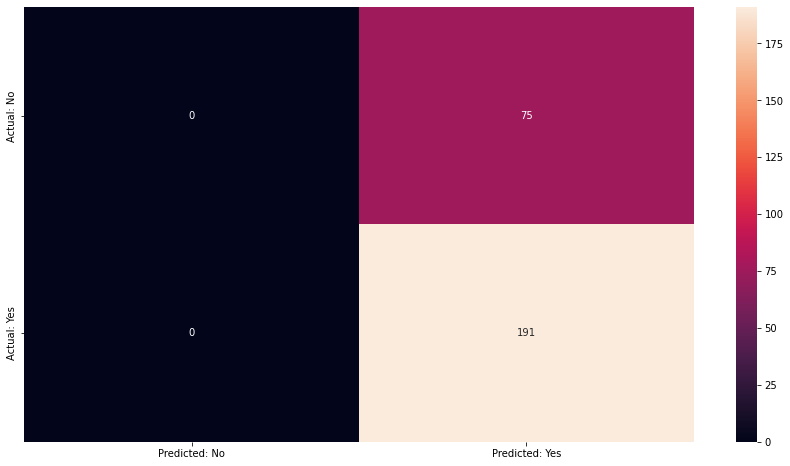

In [308]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_df.originalCredibility, y_pred_df.predicted)
cm
conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                       index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.show()

# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults

<AxesSubplot:xlabel='predicted_prob'>

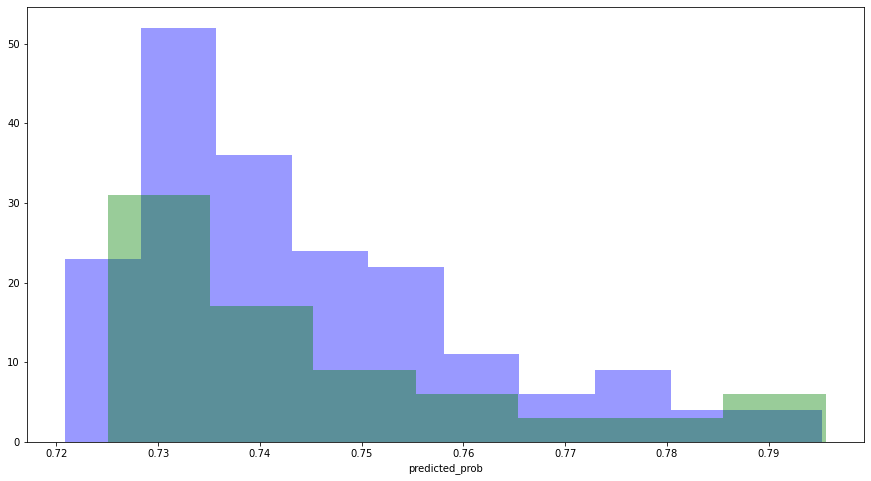

In [297]:
sns.distplot( y_pred_df[y_pred_df.originalCredibility == 1]["predicted_prob"], kde=False, color = 'b' )
sns.distplot( y_pred_df[y_pred_df.originalCredibility == 0]["predicted_prob"], kde=False, color = 'g' )